In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from datetime import datetime as dt
from copy import deepcopy
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from attacks import fgsm, pgd
from utils import clean_acc, adv_acc, print_table
from trainer import Trainer, plot_history
from model import Small
from layers import *

1.7.0
True


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

seed = torch.seed()
print(f"seed: {seed}")
torch.manual_seed(seed)

cuda
seed: 10057219926567152255


In [4]:
tr_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
vl_transform = transforms.Compose([
    transforms.ToTensor()
])

ds_train = MNIST('../data', train=True, download=True, transform=tr_transform)
ds_test = MNIST('../data', train=False, download=True, transform=vl_transform)

batch_size = (100, 400)
train_dl = DataLoader(ds_train, batch_size=batch_size[0], shuffle=True)
test_dl = DataLoader(ds_test, batch_size=batch_size[1], shuffle=True)

iter_on_batch = len(train_dl)
print(f"iter_on_batch: {iter_on_batch}")

iter_on_batch: 600


## eps 0.005 co 40 epok
## kappa schodzi do 1/2 w 40 epok

In [5]:
from hyperparam_scheduler import LinearScheduler

kappa_scheduler = LinearScheduler(start=1, end=0.5)
kappa_scheduler.calc_coefficient(-0.5, 40, iter_on_batch)

eps_scheduler = LinearScheduler(start=0)
eps_scheduler.calc_coefficient(0.005, 40, iter_on_batch)

cuda
epoch start with: eps: 0.00000000, kappa: 1.00000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 1 Validation Loss: 0.1823 accuracy: 0.9433, robust err: 0.1288

epoch start with: eps: 0.00012500, kappa: 0.98750000
function: _train_test_epoch took: 0:00:56
function: _train_test_epoch took: 0:00:01
Epoch: 2 Validation Loss: 0.1166 accuracy: 0.9651, robust err: 0.1503

epoch start with: eps: 0.00025000, kappa: 0.97500000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 3 Validation Loss: 0.0927 accuracy: 0.9750, robust err: 0.1308

epoch start with: eps: 0.00037500, kappa: 0.96250000
function: _train_test_epoch took: 0:02:13
function: _train_test_epoch took: 0:00:04
Epoch: 4 Validation Loss: 0.0801 accuracy: 0.9774, robust err: 0.1254

epoch start with: eps: 0.00050000, kappa: 0.95000000
function: _train_test_epoch took: 0:01:57
function: _train_test_epoch took: 0:00:02
Epoch: 5 Validation Loss: 

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 40 Validation Loss: 0.2073 accuracy: 0.9835, robust err: 0.0955

epoch start with: eps: 0.00500000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 41 Validation Loss: 0.2086 accuracy: 0.9830, robust err: 0.0973

epoch start with: eps: 0.00512500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 42 Validation Loss: 0.2121 accuracy: 0.9829, robust err: 0.0981

epoch start with: eps: 0.00525000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 43 Validation Loss: 0.2127 accuracy: 0.9830, robust err: 0.0975

epoch start with: eps: 0.00537500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:06
function: _train_test_epoch took: 0:00:01
Epoch: 44 Validation Loss: 0.2140 accuracy: 0.9824, robust err: 0.0986

epoch st

function: _train_test_epoch took: 0:00:02
Epoch: 79 Validation Loss: 0.2630 accuracy: 0.9802, robust err: 0.1139

epoch start with: eps: 0.00987500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:03
function: _train_test_epoch took: 0:00:01
Epoch: 80 Validation Loss: 0.2662 accuracy: 0.9803, robust err: 0.1143

epoch start with: eps: 0.01000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 81 Validation Loss: 0.2669 accuracy: 0.9803, robust err: 0.1162

epoch start with: eps: 0.01012500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 82 Validation Loss: 0.2678 accuracy: 0.9802, robust err: 0.1149

epoch start with: eps: 0.01025000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 83 Validation Loss: 0.2673 accuracy: 0.9803, robust err: 0.1148

epoch start with: eps: 0.01037500, kappa: 0.500000

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 119 Validation Loss: 0.3117 accuracy: 0.9785, robust err: 0.1246

epoch start with: eps: 0.01487500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 120 Validation Loss: 0.3120 accuracy: 0.9787, robust err: 0.1236

epoch start with: eps: 0.01500000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:56
function: _train_test_epoch took: 0:00:01
Epoch: 121 Validation Loss: 0.3131 accuracy: 0.9787, robust err: 0.1227

epoch start with: eps: 0.01512500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:51
function: _train_test_epoch took: 0:00:01
Epoch: 122 Validation Loss: 0.3145 accuracy: 0.9792, robust err: 0.1225

epoch start with: eps: 0.01525000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:01
Epoch: 123 Validation Loss: 0.3154 accuracy: 0.9793, robust err: 0.1229

epo

function: _train_test_epoch took: 0:00:01
Epoch: 158 Validation Loss: 0.3645 accuracy: 0.9775, robust err: 0.1287

epoch start with: eps: 0.01975000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 159 Validation Loss: 0.3674 accuracy: 0.9774, robust err: 0.1304

epoch start with: eps: 0.01987500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 160 Validation Loss: 0.3693 accuracy: 0.9780, robust err: 0.1308

epoch start with: eps: 0.02000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 161 Validation Loss: 0.3703 accuracy: 0.9777, robust err: 0.1317

epoch start with: eps: 0.02012500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 162 Validation Loss: 0.3695 accuracy: 0.9774, robust err: 0.1301

epoch start with: eps: 0.02025000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 198 Validation Loss: 0.4263 accuracy: 0.9768, robust err: 0.1365

epoch start with: eps: 0.02475000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 199 Validation Loss: 0.4264 accuracy: 0.9777, robust err: 0.1350

epoch start with: eps: 0.02487500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 200 Validation Loss: 0.4281 accuracy: 0.9771, robust err: 0.1369

epoch start with: eps: 0.02500000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 201 Validation Loss: 0.4334 accuracy: 0.9777, robust err: 0.1393

epoch start with: eps: 0.02512500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 202 Validation Loss: 0.4362 accuracy: 0.9778, robust err: 0.1381

epo

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 239 Validation Loss: 0.5029 accuracy: 0.9757, robust err: 0.1436

epoch start with: eps: 0.02987500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 240 Validation Loss: 0.5001 accuracy: 0.9768, robust err: 0.1445

epoch start with: eps: 0.03000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 241 Validation Loss: 0.4978 accuracy: 0.9770, robust err: 0.1389

epoch start with: eps: 0.03012500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 242 Validation Loss: 0.5070 accuracy: 0.9760, robust err: 0.1444

epoch start with: eps: 0.03025000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:01
Epoch: 243 Validation Loss: 0.5035 accuracy: 0.9766, robust err: 0.1430

epo

function: _train_test_epoch took: 0:00:02
Epoch: 278 Validation Loss: 0.5653 accuracy: 0.9769, robust err: 0.1468

epoch start with: eps: 0.03475000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 279 Validation Loss: 0.5650 accuracy: 0.9757, robust err: 0.1479

epoch start with: eps: 0.03487500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 280 Validation Loss: 0.5733 accuracy: 0.9746, robust err: 0.1486

epoch start with: eps: 0.03500000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:01
Epoch: 281 Validation Loss: 0.5792 accuracy: 0.9747, robust err: 0.1504

epoch start with: eps: 0.03512500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 282 Validation Loss: 0.5780 accuracy: 0.9764, robust err: 0.1484

epoch start with: eps: 0.03525000, kappa: 0.5

function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 318 Validation Loss: 0.6185 accuracy: 0.9762, robust err: 0.1514

epoch start with: eps: 0.03975000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 319 Validation Loss: 0.6250 accuracy: 0.9740, robust err: 0.1576

epoch start with: eps: 0.03987500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 320 Validation Loss: 0.6332 accuracy: 0.9747, robust err: 0.1616

epoch start with: eps: 0.04000000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 321 Validation Loss: 0.6174 accuracy: 0.9747, robust err: 0.1544

epoch start with: eps: 0.04012500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 322 Validation Loss: 0.6264 accuracy: 0.9751, robust err: 0.1528

epo

function: _train_test_epoch took: 0:00:02
Epoch: 357 Validation Loss: 0.6556 accuracy: 0.9736, robust err: 0.1579

epoch start with: eps: 0.04462500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 358 Validation Loss: 0.6545 accuracy: 0.9749, robust err: 0.1538

epoch start with: eps: 0.04475000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 359 Validation Loss: 0.6581 accuracy: 0.9740, robust err: 0.1594

epoch start with: eps: 0.04487500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 360 Validation Loss: 0.6617 accuracy: 0.9736, robust err: 0.1589

epoch start with: eps: 0.04500000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 361 Validation Loss: 0.6617 accuracy: 0.9733, robust err: 0.1609

epoch start with: eps: 0.04512500, kappa: 0.5

function: _train_test_epoch took: 0:00:56
function: _train_test_epoch took: 0:00:01
Epoch: 397 Validation Loss: 0.6838 accuracy: 0.9722, robust err: 0.1648

epoch start with: eps: 0.04962500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 398 Validation Loss: 0.6850 accuracy: 0.9730, robust err: 0.1656

epoch start with: eps: 0.04975000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 399 Validation Loss: 0.6781 accuracy: 0.9732, robust err: 0.1643

epoch start with: eps: 0.04987500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 400 Validation Loss: 0.6937 accuracy: 0.9723, robust err: 0.1682

epoch start with: eps: 0.05000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 401 Validation Loss: 0.6817 accuracy: 0.9717, robust err: 0.1659

epo

function: _train_test_epoch took: 0:00:01
Epoch: 436 Validation Loss: 0.6609 accuracy: 0.9712, robust err: 0.1696

epoch start with: eps: 0.05450000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 437 Validation Loss: 0.6674 accuracy: 0.9726, robust err: 0.1704

epoch start with: eps: 0.05462500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 438 Validation Loss: 0.6692 accuracy: 0.9707, robust err: 0.1757

epoch start with: eps: 0.05475000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 439 Validation Loss: 0.6572 accuracy: 0.9724, robust err: 0.1690

epoch start with: eps: 0.05487500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 440 Validation Loss: 0.6697 accuracy: 0.9704, robust err: 0.1763

epoch start with: eps: 0.05500000, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 476 Validation Loss: 0.6357 accuracy: 0.9718, robust err: 0.1690

epoch start with: eps: 0.05950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 477 Validation Loss: 0.6463 accuracy: 0.9710, robust err: 0.1710

epoch start with: eps: 0.05962500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:01
Epoch: 478 Validation Loss: 0.6394 accuracy: 0.9733, robust err: 0.1682

epoch start with: eps: 0.05975000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:50
function: _train_test_epoch took: 0:00:02
Epoch: 479 Validation Loss: 0.6462 accuracy: 0.9722, robust err: 0.1748

epoch start with: eps: 0.05987500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 480 Validation Loss: 0.6370 accuracy: 0.9718, robust err: 0.1676

epo

function: _train_test_epoch took: 0:00:02
Epoch: 515 Validation Loss: 0.6572 accuracy: 0.9692, robust err: 0.1784

epoch start with: eps: 0.06437500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 516 Validation Loss: 0.6649 accuracy: 0.9702, robust err: 0.1833

epoch start with: eps: 0.06450000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 517 Validation Loss: 0.6573 accuracy: 0.9693, robust err: 0.1772

epoch start with: eps: 0.06462500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 518 Validation Loss: 0.6573 accuracy: 0.9708, robust err: 0.1735

epoch start with: eps: 0.06475000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 519 Validation Loss: 0.6634 accuracy: 0.9687, robust err: 0.1806

epoch start with: eps: 0.06487500, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 555 Validation Loss: 0.6782 accuracy: 0.9677, robust err: 0.1858

epoch start with: eps: 0.06937500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 556 Validation Loss: 0.6721 accuracy: 0.9681, robust err: 0.1784

epoch start with: eps: 0.06950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 557 Validation Loss: 0.6814 accuracy: 0.9698, robust err: 0.1786

epoch start with: eps: 0.06962500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 558 Validation Loss: 0.6695 accuracy: 0.9698, robust err: 0.1749

epoch start with: eps: 0.06975000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 559 Validation Loss: 0.6611 accuracy: 0.9710, robust err: 0.1749

epo

function: _train_test_epoch took: 0:00:02
Epoch: 594 Validation Loss: 0.6581 accuracy: 0.9701, robust err: 0.1742

epoch start with: eps: 0.07425000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 595 Validation Loss: 0.6776 accuracy: 0.9658, robust err: 0.1872

epoch start with: eps: 0.07437500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 596 Validation Loss: 0.6498 accuracy: 0.9688, robust err: 0.1775

epoch start with: eps: 0.07450000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 597 Validation Loss: 0.6621 accuracy: 0.9681, robust err: 0.1866

epoch start with: eps: 0.07462500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 598 Validation Loss: 0.6618 accuracy: 0.9681, robust err: 0.1820

epoch start with: eps: 0.07475000, kappa: 0.5

function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 634 Validation Loss: 0.6062 accuracy: 0.9652, robust err: 0.1921

epoch start with: eps: 0.07925000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 635 Validation Loss: 0.6037 accuracy: 0.9664, robust err: 0.1895

epoch start with: eps: 0.07937500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 636 Validation Loss: 0.6037 accuracy: 0.9641, robust err: 0.1855

epoch start with: eps: 0.07950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 637 Validation Loss: 0.6004 accuracy: 0.9680, robust err: 0.1827

epoch start with: eps: 0.07962500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 638 Validation Loss: 0.6011 accuracy: 0.9658, robust err: 0.1819

epo

function: _train_test_epoch took: 0:00:02
Epoch: 673 Validation Loss: 0.6074 accuracy: 0.9648, robust err: 0.2013

epoch start with: eps: 0.08412500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 674 Validation Loss: 0.6053 accuracy: 0.9622, robust err: 0.1938

epoch start with: eps: 0.08425000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 675 Validation Loss: 0.6182 accuracy: 0.9606, robust err: 0.2058

epoch start with: eps: 0.08437500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:01
Epoch: 676 Validation Loss: 0.5968 accuracy: 0.9652, robust err: 0.1971

epoch start with: eps: 0.08450000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 677 Validation Loss: 0.5829 accuracy: 0.9654, robust err: 0.1848

epoch start with: eps: 0.08462500, kappa: 0.5

function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 713 Validation Loss: 0.5898 accuracy: 0.9625, robust err: 0.2007

epoch start with: eps: 0.08912500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 714 Validation Loss: 0.5880 accuracy: 0.9621, robust err: 0.1929

epoch start with: eps: 0.08925000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 715 Validation Loss: 0.5818 accuracy: 0.9632, robust err: 0.1899

epoch start with: eps: 0.08937500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 716 Validation Loss: 0.5777 accuracy: 0.9640, robust err: 0.1931

epoch start with: eps: 0.08950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:49
function: _train_test_epoch took: 0:00:02
Epoch: 717 Validation Loss: 0.5766 accuracy: 0.9630, robust err: 0.1867

epo

function: _train_test_epoch took: 0:00:01
Epoch: 752 Validation Loss: 0.5794 accuracy: 0.9628, robust err: 0.1963

epoch start with: eps: 0.09400000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:02
function: _train_test_epoch took: 0:00:02
Epoch: 753 Validation Loss: 0.5761 accuracy: 0.9601, robust err: 0.1977

epoch start with: eps: 0.09412500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 754 Validation Loss: 0.5770 accuracy: 0.9644, robust err: 0.1900

epoch start with: eps: 0.09425000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 755 Validation Loss: 0.5640 accuracy: 0.9648, robust err: 0.1853

epoch start with: eps: 0.09437500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 756 Validation Loss: 0.5615 accuracy: 0.9661, robust err: 0.1826

epoch start with: eps: 0.09450000, kappa: 0.5

function: _train_test_epoch took: 0:01:02
function: _train_test_epoch took: 0:00:01
Epoch: 792 Validation Loss: 0.5497 accuracy: 0.9640, robust err: 0.1902

epoch start with: eps: 0.09900000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 793 Validation Loss: 0.5543 accuracy: 0.9628, robust err: 0.2009

epoch start with: eps: 0.09912500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 794 Validation Loss: 0.5357 accuracy: 0.9622, robust err: 0.1936

epoch start with: eps: 0.09925000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 795 Validation Loss: 0.5447 accuracy: 0.9593, robust err: 0.2007

epoch start with: eps: 0.09937500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 796 Validation Loss: 0.5384 accuracy: 0.9638, robust err: 0.1889

epo

function: _train_test_epoch took: 0:00:02
Epoch: 831 Validation Loss: 0.5507 accuracy: 0.9597, robust err: 0.2063

epoch start with: eps: 0.10387500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 832 Validation Loss: 0.5654 accuracy: 0.9620, robust err: 0.2048

epoch start with: eps: 0.10400000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 833 Validation Loss: 0.5427 accuracy: 0.9627, robust err: 0.1950

epoch start with: eps: 0.10412500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 834 Validation Loss: 0.5479 accuracy: 0.9596, robust err: 0.2045

epoch start with: eps: 0.10425000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 835 Validation Loss: 0.5350 accuracy: 0.9629, robust err: 0.1915

epoch start with: eps: 0.10437500, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 871 Validation Loss: 0.5455 accuracy: 0.9589, robust err: 0.2071

epoch start with: eps: 0.10887500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:01
function: _train_test_epoch took: 0:00:02
Epoch: 872 Validation Loss: 0.5287 accuracy: 0.9619, robust err: 0.2039

epoch start with: eps: 0.10900000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 873 Validation Loss: 0.5251 accuracy: 0.9621, robust err: 0.1935

epoch start with: eps: 0.10912500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 874 Validation Loss: 0.5283 accuracy: 0.9619, robust err: 0.2022

epoch start with: eps: 0.10925000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 875 Validation Loss: 0.5536 accuracy: 0.9588, robust err: 0.2077

epo

function: _train_test_epoch took: 0:00:02
Epoch: 910 Validation Loss: 0.5656 accuracy: 0.9582, robust err: 0.2155

epoch start with: eps: 0.11375000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 911 Validation Loss: 0.5436 accuracy: 0.9603, robust err: 0.2039

epoch start with: eps: 0.11387500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 912 Validation Loss: 0.5637 accuracy: 0.9577, robust err: 0.2140

epoch start with: eps: 0.11400000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 913 Validation Loss: 0.5402 accuracy: 0.9614, robust err: 0.1991

epoch start with: eps: 0.11412500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 914 Validation Loss: 0.5476 accuracy: 0.9586, robust err: 0.2069

epoch start with: eps: 0.11425000, kappa: 0.5

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 950 Validation Loss: 0.5532 accuracy: 0.9591, robust err: 0.2034

epoch start with: eps: 0.11875000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:02
function: _train_test_epoch took: 0:00:02
Epoch: 951 Validation Loss: 0.5653 accuracy: 0.9554, robust err: 0.2128

epoch start with: eps: 0.11887500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 952 Validation Loss: 0.5529 accuracy: 0.9609, robust err: 0.1959

epoch start with: eps: 0.11900000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 953 Validation Loss: 0.5517 accuracy: 0.9576, robust err: 0.1976

epoch start with: eps: 0.11912500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 954 Validation Loss: 0.5351 accuracy: 0.9599, robust err: 0.1993

epo

function: _train_test_epoch took: 0:00:01
Epoch: 989 Validation Loss: 0.5472 accuracy: 0.9582, robust err: 0.2038

epoch start with: eps: 0.12362500, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 990 Validation Loss: 0.5538 accuracy: 0.9556, robust err: 0.2071

epoch start with: eps: 0.12375000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 991 Validation Loss: 0.5474 accuracy: 0.9610, robust err: 0.2005

epoch start with: eps: 0.12387500, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 992 Validation Loss: 0.5532 accuracy: 0.9602, robust err: 0.2041

epoch start with: eps: 0.12400000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 993 Validation Loss: 0.5493 accuracy: 0.9591, robust err: 0.2033

epoch start with: eps: 0.12412500, kappa: 0.5

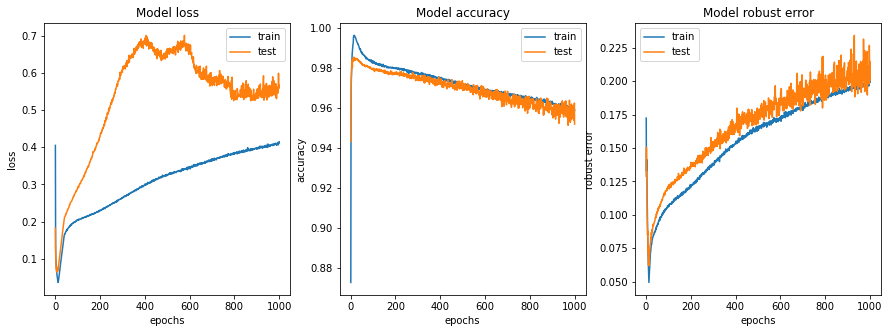

In [6]:
model_name = "mnist_small_0_005_exp1"


trainer = Trainer(model_name, train_dl, test_dl, eps_scheduler, kappa_scheduler, checkpoint=10)
model = Small()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-4,
                                                 patience=2, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=1000)
plot_history(model_name, history)

In [7]:
print(f"max eps: {eps_scheduler.current}")

max eps: 0.12500000000069653


In [8]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds = MNIST('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 400, shuffle=True)


def create_attack(eps, alpha, num_iter):
    d = {
        "epsilon": eps,
        "alpha": alpha,
        "num_iter": num_iter
    }
    return f"e={eps:.1f},a={alpha:.1f},i={num_iter}", d
    

attack1 = create_attack(eps=0.1, alpha=0.1, num_iter=30)
attack2 = create_attack(eps=0.2, alpha=0.1, num_iter=30)
attack3 = create_attack(eps=0.3, alpha=0.1, num_iter=30)
attack4 = create_attack(eps=0.4, alpha=0.1, num_iter=30)

params = [attack1, attack2, attack3, attack4]

In [9]:
model_name = "mnist_small_0_005_exp1"

In [10]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_10.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.984                             
name: e=0.1,a=0.1,i=30 accuracy: 0.5831           
name: e=0.2,a=0.1,i=30 accuracy: 0.0011           
name: e=0.3,a=0.1,i=30 accuracy: 0.0000           
name: e=0.4,a=0.1,i=30 accuracy: 0.0000           


In [11]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_100.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9791                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7883           
name: e=0.2,a=0.1,i=30 accuracy: 0.0301           
name: e=0.3,a=0.1,i=30 accuracy: 0.0032           
name: e=0.4,a=0.1,i=30 accuracy: 0.0024           


In [12]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_200.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9771                            
name: e=0.1,a=0.1,i=30 accuracy: 0.8002           
name: e=0.2,a=0.1,i=30 accuracy: 0.0856           
name: e=0.3,a=0.1,i=30 accuracy: 0.0447           
name: e=0.4,a=0.1,i=30 accuracy: 0.0335           


In [13]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_300.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9748                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7902           
name: e=0.2,a=0.1,i=30 accuracy: 0.1073           
name: e=0.3,a=0.1,i=30 accuracy: 0.0717           
name: e=0.4,a=0.1,i=30 accuracy: 0.0692           


In [14]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_400.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9723                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7707           
name: e=0.2,a=0.1,i=30 accuracy: 0.0836           
name: e=0.3,a=0.1,i=30 accuracy: 0.0497           
name: e=0.4,a=0.1,i=30 accuracy: 0.0483           


In [15]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_500.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9687                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7486           
name: e=0.2,a=0.1,i=30 accuracy: 0.0746           
name: e=0.3,a=0.1,i=30 accuracy: 0.0398           
name: e=0.4,a=0.1,i=30 accuracy: 0.0404           


In [16]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_600.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.969                             
name: e=0.1,a=0.1,i=30 accuracy: 0.7223           
name: e=0.2,a=0.1,i=30 accuracy: 0.0643           
name: e=0.3,a=0.1,i=30 accuracy: 0.0161           
name: e=0.4,a=0.1,i=30 accuracy: 0.0142           


In [17]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_700.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9656                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7212           
name: e=0.2,a=0.1,i=30 accuracy: 0.0806           
name: e=0.3,a=0.1,i=30 accuracy: 0.0447           
name: e=0.4,a=0.1,i=30 accuracy: 0.0440           


In [18]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_800.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9642                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7124           
name: e=0.2,a=0.1,i=30 accuracy: 0.0906           
name: e=0.3,a=0.1,i=30 accuracy: 0.0557           
name: e=0.4,a=0.1,i=30 accuracy: 0.0546           


In [19]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_900.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9603                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6944           
name: e=0.2,a=0.1,i=30 accuracy: 0.1143           
name: e=0.3,a=0.1,i=30 accuracy: 0.0862           
name: e=0.4,a=0.1,i=30 accuracy: 0.0854           


In [20]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_1000.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9519                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6735           
name: e=0.2,a=0.1,i=30 accuracy: 0.1552           
name: e=0.3,a=0.1,i=30 accuracy: 0.1235           
name: e=0.4,a=0.1,i=30 accuracy: 0.1234           
